# **Supply Chain Management System**

## Abstract

This project analyzes e-commerce supply chain data using Tableau for visualization, SQL for backend data operations, and Python for predictive modeling. It focuses on orders, payments, customers, and product behaviors. A machine learning model forecasts daily order volumes to optimize logistics.




---



In [1]:

import pandas as pd
import numpy as np

# For uploading files
from google.colab import files

# For plotting
import matplotlib.pyplot as plt

# Scikit-learn for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import files
uploaded = files.upload()


Saving df_Orders.csv to df_Orders.csv


In [3]:
import pandas as pd

# Load the Orders CSV (replace with your filename if different)
df = pd.read_csv("df_Orders.csv", parse_dates=['order_purchase_timestamp'])

# Convert timestamp to just date
df['order_date'] = df['order_purchase_timestamp'].dt.date

# Group by date to count number of orders per day
daily_orders = df.groupby('order_date').size().reset_index(name='order_volume')

# Convert date to ordinal for model input
daily_orders['date_ordinal'] = pd.to_datetime(daily_orders['order_date']).map(pd.Timestamp.toordinal)

daily_orders.head()


/tmp/ipython-input-3021742790.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("df_Orders.csv", parse_dates=['order_purchase_timestamp'])


,order_date,order_volume,date_ordinal
0,2016-10-03,3,736240
1,2016-10-04,22,736241
2,2016-10-05,16,736242
3,2016-10-06,17,736243
4,2016-10-07,15,736244


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Feature: date_ordinal | Target: order_volume
X = daily_orders[['date_ordinal']]
y = daily_orders['order_volume']

# Normalize the feature
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
predictions = model.predict(X_test)


In [6]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 577.1388522741604


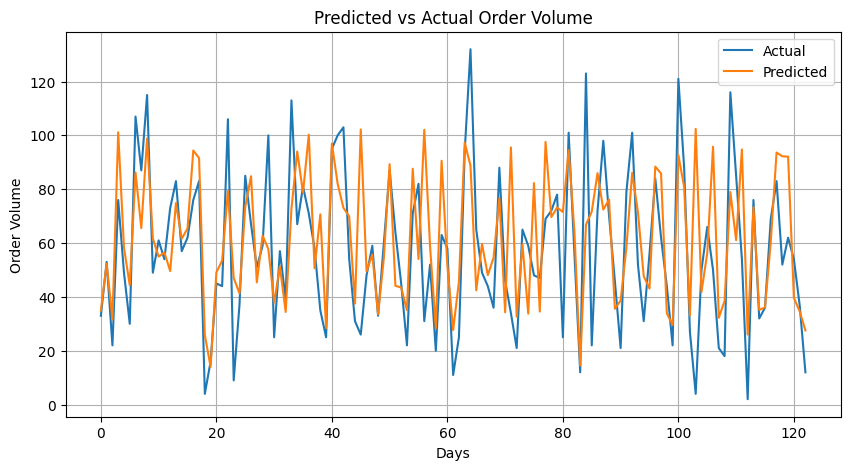

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title("Predicted vs Actual Order Volume")
plt.xlabel("Days")
plt.ylabel("Order Volume")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate polynomial features (degree = 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_scaled)

# Train/test split on polynomial features
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train model
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# Predict
poly_predictions = poly_model.predict(X_test)

# Evaluate
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_r2 = r2_score(y_test, poly_predictions)

print("Polynomial Regression")
print("Mean Squared Error:", poly_mse)
print("R² Score:", poly_r2)


Polynomial Regression
Mean Squared Error: 452.3591433042068
R² Score: 0.45603160230423156


In [9]:
from sklearn.ensemble import RandomForestRegressor

# Train/test split (same as earlier)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_predictions = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regressor")
print("Mean Squared Error:", rf_mse)
print("R² Score:", rf_r2)


Random Forest Regressor
Mean Squared Error: 580.6560707317074
R² Score: 0.30175269565439944


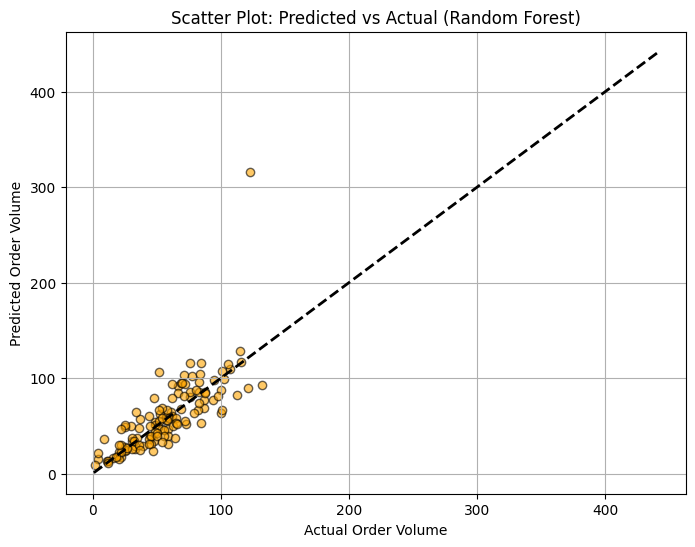

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.6, color='orange', edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', lw=2)
plt.xlabel("Actual Order Volume")
plt.ylabel("Predicted Order Volume")
plt.title("Scatter Plot: Predicted vs Actual (Random Forest)")
plt.grid(True)
plt.show()
